In [20]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [21]:
camera = 1
original_scale = (3840, 2160)
display_scale = (1280, 720)

scale_ratio = original_scale[0] / display_scale[0]

In [22]:
image = cv2.imread(f'../extrinsic_calibration_images/out{camera}.png')

In [23]:
# function to display the coordinates of 
# of the points clicked on the image  
def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        global point
        point = np.array([int(scale_ratio * x), int(scale_ratio * y), 1])
        print(point) 
  
        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        imS = cv2.resize(image, display_scale)
        cv2.putText(imS, str(point[0]) + ',' +
                    str(point[1]), (x,y), font, 
                    1, (255, 0, 0), 2)
        cv2.imshow('image', imS) 

In [24]:
imS = cv2.resize(image, display_scale) 
cv2.imshow('image', imS)
# setting mouse handler for the image and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0)
cv2.destroyAllWindows()


[1488  969    1]


In [25]:
homography_matrix = np.load(f'../homography_matrices/{camera}.npy')
world_point = np.dot(homography_matrix, point)
world_point = world_point / world_point[2]

(-0.908562972229401, 18.900407760582354, 9.45, -0.45)

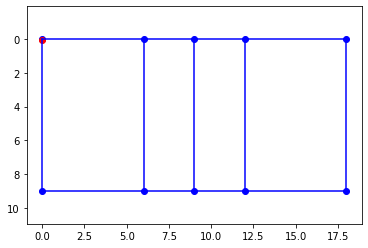

In [26]:
# plot the court
plt.scatter([0, 0, 6, 6, 9, 9, 12, 12, 18, 18], [0, 9, 0, 9, 0, 9, 0, 9, 0, 9], color='blue')
plt.plot([0, 0], [0, 9], 'blue')
plt.plot([6, 6], [0, 9], 'blue')
plt.plot([9, 9], [0, 9], 'blue')
plt.plot([12, 12], [0, 9], 'blue')
plt.plot([18, 18], [0, 9], 'blue')
plt.plot([0, 18], [0, 0], 'blue')
plt.plot([0, 18], [9, 9], 'blue')

# plot the point
plt.scatter(world_point[0], world_point[1], color='red')

# invert the y axis so origin is in top left corner
plt.gca().invert_yaxis()

plt.axis('equal')

In [27]:
# loop over other images - try to find point
homographies = {
    '1': np.load('../homography_matrices/1.npy'),
    '2': np.load('../homography_matrices/2.npy'),
    '3': np.load('../homography_matrices/3.npy'),
    '4': np.load('../homography_matrices/4.npy'),
    '5': np.load('../homography_matrices/5.npy'),
    '6': np.load('../homography_matrices/6.npy'),
    '7': np.load('../homography_matrices/7.npy'),
    '8': np.load('../homography_matrices/8.npy'),
    '12': np.load('../homography_matrices/12.npy'),
    '13': np.load('../homography_matrices/13.npy')
}


In [34]:
for camera in homographies.keys():
    image_point = np.dot(np.linalg.inv(homographies[camera]), world_point)
    image_point = (image_point / image_point[2])[:2]
    
    if 0 < image_point[0] < original_scale[0] and 0 < image_point[1] < original_scale[1]:
        image2 = cv2.imread(f'../extrinsic_calibration_images/out{camera}.png')
        cv2.circle(image2, image_point.astype(int), 15, (0, 0, 255), 3)
        im2 = cv2.resize(image2, display_scale) 
        cv2.imshow(f'Camera {camera}', im2)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f'Camera {camera} does not see this point.')
    

1 [1488.  969.]
2 [1065.00751416 1016.8774079 ]
3 [1994.61304734  997.58075821]
4 [-119.32420084  914.3693788 ]
Camera 4 does not see this point.
5 [-340.16264493 1549.17593438]
Camera 5 does not see this point.
6 [3568.59757535 1704.99976455]
7 [2332.70811288 1084.1878088 ]
8 [5031.60544631  549.07285347]
Camera 8 does not see this point.
12 [1372.28741779  680.15124268]
13 [ 573.15603301 1397.31123808]


In [29]:
# # find point in other images 
# homography_2 = np.load('../homography_matrices/2.npy')
# image_point = np.dot(np.linalg.inv(homography_2), world_point)
# image_point = (image_point / image_point[2])[:2]

# if image_point[0] < original_scale[0] and image_point[1] < original_scale[1]:
#     image2 = cv2.imread(f'../extrinsic_calibration_images/out2.png')
#     cv2.circle(image2, image_point.astype(int), 10, (0, 0, 255), 2)
#     im2 = cv2.resize(image2, display_scale) 
#     cv2.imshow('image', im2)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

In [30]:
# # find point in other images 
# homography_3 = np.load('../homography_matrices/3.npy')
# image_point = np.dot(np.linalg.inv(homography_3), world_point)
# image_point = (image_point / image_point[2])[:2]

# if image_point[0] < original_scale[0] and image_point[1] < original_scale[1]:
#     image2 = cv2.imread(f'../extrinsic_calibration_images/out3.png')
#     cv2.circle(image2, image_point.astype(int), 10, (0, 0, 255), 2)
#     im2 = cv2.resize(image2, display_scale) 
#     cv2.imshow('image', im2)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()